# Md. Rakibul Hasan
# 2017831005

In [1]:
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.layers import Dense, Flatten, Conv2D, Dropout, MaxPooling2D, AvgPool2D
from tensorflow.keras.callbacks import CSVLogger, ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
from sklearn.model_selection import train_test_split

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import PIL
import cv2

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [15]:
# zip_path = '/content/drive/MyDrive/Final_Assignment/CNN_Dataset.zip'
# extract_path = '/content/drive/MyDrive/Final_Assignment'
# !unzip '{zip_path}' -d '{extract_path}'

In [8]:
data_dir = '/content/drive/MyDrive/Final_Assignment/CNN_dataset'

categories = sorted(x for x in os.listdir(data_dir) if os.path.isdir(os.path.join(data_dir, x)))
total_categories = len(categories)
img_per_category = [sorted(os.listdir(os.path.join(data_dir, categories[i]))) for i in range(total_categories)]
img_per_category_count = [len(img_per_category[i]) for i in range(total_categories)]
image_file = [os.path.join(data_dir, categories[i], x) for i in range(total_categories) for x in img_per_category[i]]
image_category = [i for i in range(total_categories) for _ in img_per_category[i]]
total_image_count = len(image_file)
dimension = PIL.Image.open(image_file[0]).size

print("Dimension", dimension)
print("Categories", categories)
print("Images per category", img_per_category_count)


Dimension (64, 64)
Categories ['AbdomenCT', 'CXR', 'ChestCT', 'Hand', 'HeadCT']
Images per category [10000, 10000, 10000, 10000, 10000]


In [9]:
image_list = []
for image_path in image_file:
  image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
  image_list.append(image)

In [10]:
image_list = np.array(image_list)
image_category = np.array(image_category)

x_train, x_test, y_train, y_test = train_test_split(image_list, image_category, 
                                                    test_size=0.1, 
                                                    stratify=image_category, 
                                                    random_state=13)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, 
                                                  test_size=0.1/(1-0.1), 
                                                  stratify=y_train, 
                                                  random_state=13)

print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_val shape:", x_val.shape)
print("y_val shape:", y_val.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

x_train shape: (40000, 64, 64)
y_train shape: (40000,)
x_val shape: (5000, 64, 64)
y_val shape: (5000,)
x_test shape: (5000, 64, 64)
y_test shape: (5000,)


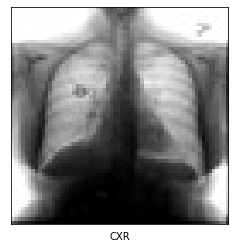

In [26]:
plt.xticks([])
plt.yticks([])
plt.xlabel(categories[y_train[700]])
plt.imshow(x_train[700],cmap=plt.cm.binary)

In [27]:
model = tf.keras.Sequential()
model.add(Conv2D(filters=64, kernel_size=(3,3),strides=(1, 1), padding='same', activation='relu', input_shape=(64,64,1))) 
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.1))
model.add(Conv2D(filters=32, kernel_size=(3,3),strides=(1, 1), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Conv2D(filters=16, kernel_size=(3,3),strides=(1, 1), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(5, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 64, 64, 64)        640       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 32, 32, 64)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 32, 32, 64)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 32, 32, 32)        18464     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 dropout_5 (Dropout)         (None, 16, 16, 32)       

In [13]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [14]:
model_log=model.fit(x_train, y_train,
          batch_size=50,
          epochs=10,
          verbose=1,
          validation_split=.3)

Epoch 1/10
560/560 [==============================] - 399s 708ms/step - loss: 0.7080 - accuracy: 0.8793 - val_loss: 0.0429 - val_accuracy: 0.9892
Epoch 2/10
560/560 [==============================] - 396s 707ms/step - loss: 0.0633 - accuracy: 0.9814 - val_loss: 0.0183 - val_accuracy: 0.9947
Epoch 3/10
560/560 [==============================] - 398s 712ms/step - loss: 0.0402 - accuracy: 0.9872 - val_loss: 0.0191 - val_accuracy: 0.9937
Epoch 4/10
560/560 [==============================] - 385s 688ms/step - loss: 0.0345 - accuracy: 0.9899 - val_loss: 0.0397 - val_accuracy: 0.9831
Epoch 5/10
560/560 [==============================] - 395s 706ms/step - loss: 0.0232 - accuracy: 0.9934 - val_loss: 0.0088 - val_accuracy: 0.9981
Epoch 6/10
560/560 [==============================] - 397s 709ms/step - loss: 0.0280 - accuracy: 0.9927 - val_loss: 0.0075 - val_accuracy: 0.9981
Epoch 7/10
560/560 [==============================] - 388s 694ms/step - loss: 0.0199 - accuracy: 0.9943 - val_loss: 0.0112 -

# Result : Final Accuracy 0.9957